In [19]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import math
import random
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import norm


In [20]:
# print(norm.cdf(1.96))
#math.log(x)

In [67]:
Asset=100            #c5
volatility=0.2       #c6
Drift=0.12           #c7
Interest=0.05#rate   #c8
Strike=100          #c10
Expiry=1             #c11
TimeStep=0.01       #h5
n=100 #number of sample generated 

K=100  #run the sim K times

In [68]:
TimeArr=[]
TimeArr.append(0)

AssetArr=[]
AssetArr.append(Asset)

dummy1=(math.log(AssetArr[0]/Strike)+(Interest+0.5*volatility*volatility)*(Expiry-TimeArr[0]))/(volatility*math.sqrt(abs(Expiry-TimeArr[0])))
d1=[]
d1.append(dummy1)

dummy2=d1[0]-(volatility*math.sqrt(abs(Expiry-TimeArr[0])))
d2=[]
d2.append(dummy2)


dummy3=AssetArr[0]*norm.cdf(d1[0])-Strike*math.exp((-Interest)*(Expiry-TimeArr[0]))*norm.cdf(d2[0])
options=[]
options.append(dummy3)

dummy4=norm.cdf(d1[0])
delta=[]
delta.append(dummy4)

dummy5=0
portfolio_neg=[]
portfolio_neg.append(0)

dummy6=options[0]-delta[0]*AssetArr[0]
portfolio_pos=[]
portfolio_pos.append(dummy6)

dummy7=0
HE=[]#Hedge Error
HE.append(0)

dummy8=0
CF=[] #Cash flow
CF.append(0)

dummy9=-(0-delta[0]*AssetArr[0])-options[0]
bal=[] #Balance
bal.append(dummy9)


dummy10=0
NP=[] #NetProfit
NP.append(0)

In [69]:
#instead of accessing the array eerytime for the ith element, we could just use the dummy1-9 to speed up the proccess 
for j in range(1,K):
    for i in range(1,n):
        TimeArr.append(TimeArr[i-1]+TimeStep)

        dummy0=AssetArr[i-1]*(1+Drift*TimeStep+volatility*math.sqrt(TimeStep)*(random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)+random.uniform(0, 1)-6))
        AssetArr.append(dummy0)

        dummy1=(math.log(AssetArr[i]/Strike)+(Interest+0.5*volatility*volatility)*(Expiry-TimeArr[i]))/(volatility*math.sqrt(abs(Expiry-TimeArr[i])))
        d1.append(dummy1)

        dummy2=d1[i]-(volatility*math.sqrt(abs(Expiry-TimeArr[i])))
        d2.append(dummy2)

        dummy3=AssetArr[i]*norm.cdf(d1[i])-Strike*math.exp((-Interest)*(Expiry-TimeArr[i]))*norm.cdf(d2[i])
        options.append(dummy3)

        dummy4=norm.cdf(d1[i])
        delta.append(dummy4)

        dummy5=options[i]-delta[i-1]*AssetArr[i]
        portfolio_neg.append(dummy5)

        dummy6=options[i]-delta[i]*AssetArr[i]
        portfolio_pos.append(dummy6)

        dummy7=portfolio_pos[i-1]*math.exp(Interest*(TimeStep))-portfolio_neg[i]
        HE.append(dummy7)

        dummy8=(delta[i]-delta[i-1])*AssetArr[i]
        CF.append(dummy8)

        dummy9=bal[i-1]*math.exp(Interest*(TimeStep))+CF[i] 
        bal.append(dummy9)


        dummy10=bal[i]+(options[i]-delta[i]*AssetArr[i])
        NP.append(dummy10)

        # print(NP)
        Total=bal[i]+options[i]-delta[i]*AssetArr[i]
print(Total)

-1.111169482424657


-1.111169482424657


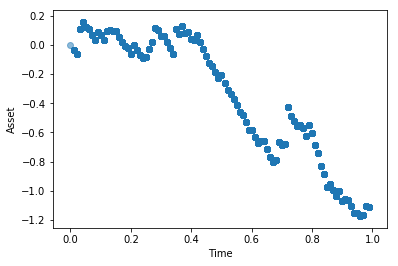

In [71]:
x = TimeArr
y = NP
print(Total)


plt.scatter(x, y,alpha=0.5)
# plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Asset")
plt.legend(loc=2)
plt.show()